In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from multiprocessing import Pool

import seaborn as sns
import matplotlib.pyplot as plt

from modules.utilities.simulation_utils import run_simulation

In [7]:
MAX_ITER = 2000
MAX_STEPS = 2000
WORLDS = ['treasure_island', 'grid', 'wall', 'double_wall', 'tbone', 'maze']

## Agents Comparison

In [8]:
agents = [
    {'normal': {}},
    {'addicted': {'salience_factor': 1.1}},
    {'depleted': {'dopamine_alteration': 0.9}}
]

args = []

for world in WORLDS:
    
    for agent in agents:
        
        args.append(
            (
                agent, 
                world, 
                'agents_comparison', 
                MAX_ITER, 
                MAX_STEPS,
                2000
            
            )
        )

In [ ]:
pool = Pool()
sim_summaries = pool.starmap(
    run_simulation,
    args
)

## Salience Sensitivity Analysis

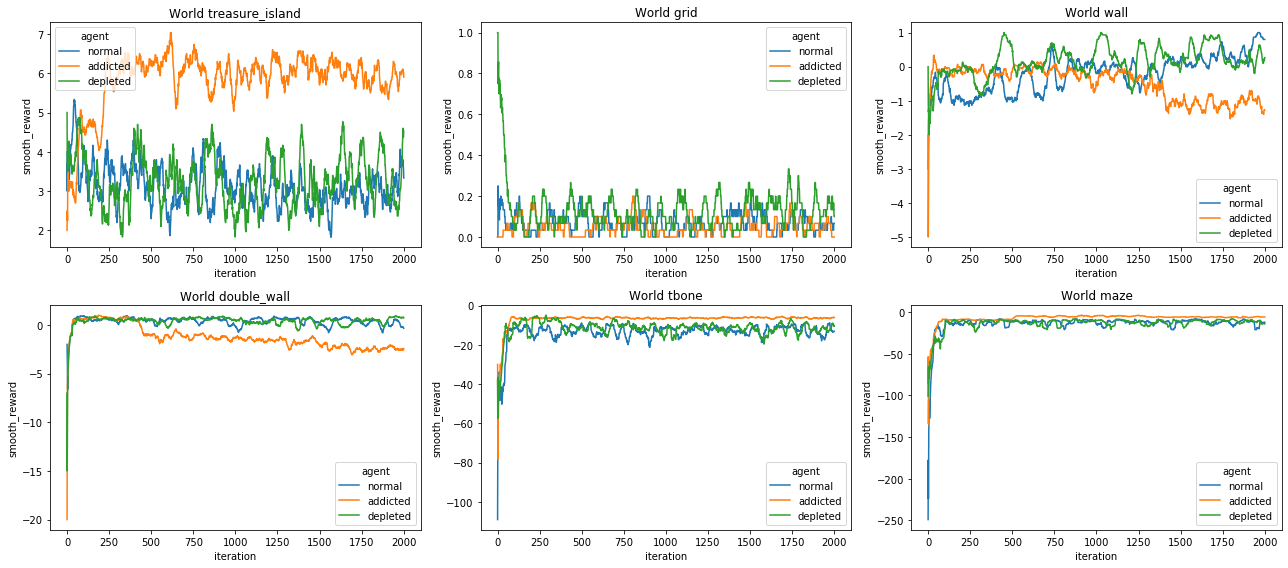

In [55]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for world, ax in zip(WORLDS, axs.flatten()):
    
    sns.lineplot(
        x='iteration',
        y='smooth_reward',
        hue='agent',
        data=comparison_summary[
            comparison_summary['world'] == world
        ],
        ax=ax
    )
    ax.set_title(f'World {world}')

plt.tight_layout()
plt.show()

[      iteration  steps  reward     error  smooth_steps  smooth_reward  \
 0           0.0  394.0     4.0  5.272271    394.000000       4.000000   
 1           1.0  291.0     4.0  4.548012    342.500000       4.000000   
 2           2.0  185.0     2.0  7.756061    290.000000       3.333333   
 3           3.0  227.0     4.0  5.984681    274.250000       3.500000   
 4           4.0   98.0     6.0  9.396971    239.000000       4.000000   
 ...         ...    ...     ...       ...           ...            ...   
 5998     1996.0   91.0     3.0 -1.093730     91.333333       3.900000   
 5999     1997.0   76.0     5.0  1.808993     89.666667       3.966667   
 6000     1998.0   40.0     5.0  5.627689     88.100000       4.000000   
 6001     1999.0  133.0     5.0 -4.584914     87.933333       4.100000   
 6002     2000.0   49.0     4.0  3.097813     86.600000       4.033333   
 
       smooth_error            world     agent  
 0         5.272271  treasure_island    normal  
 1         4